In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

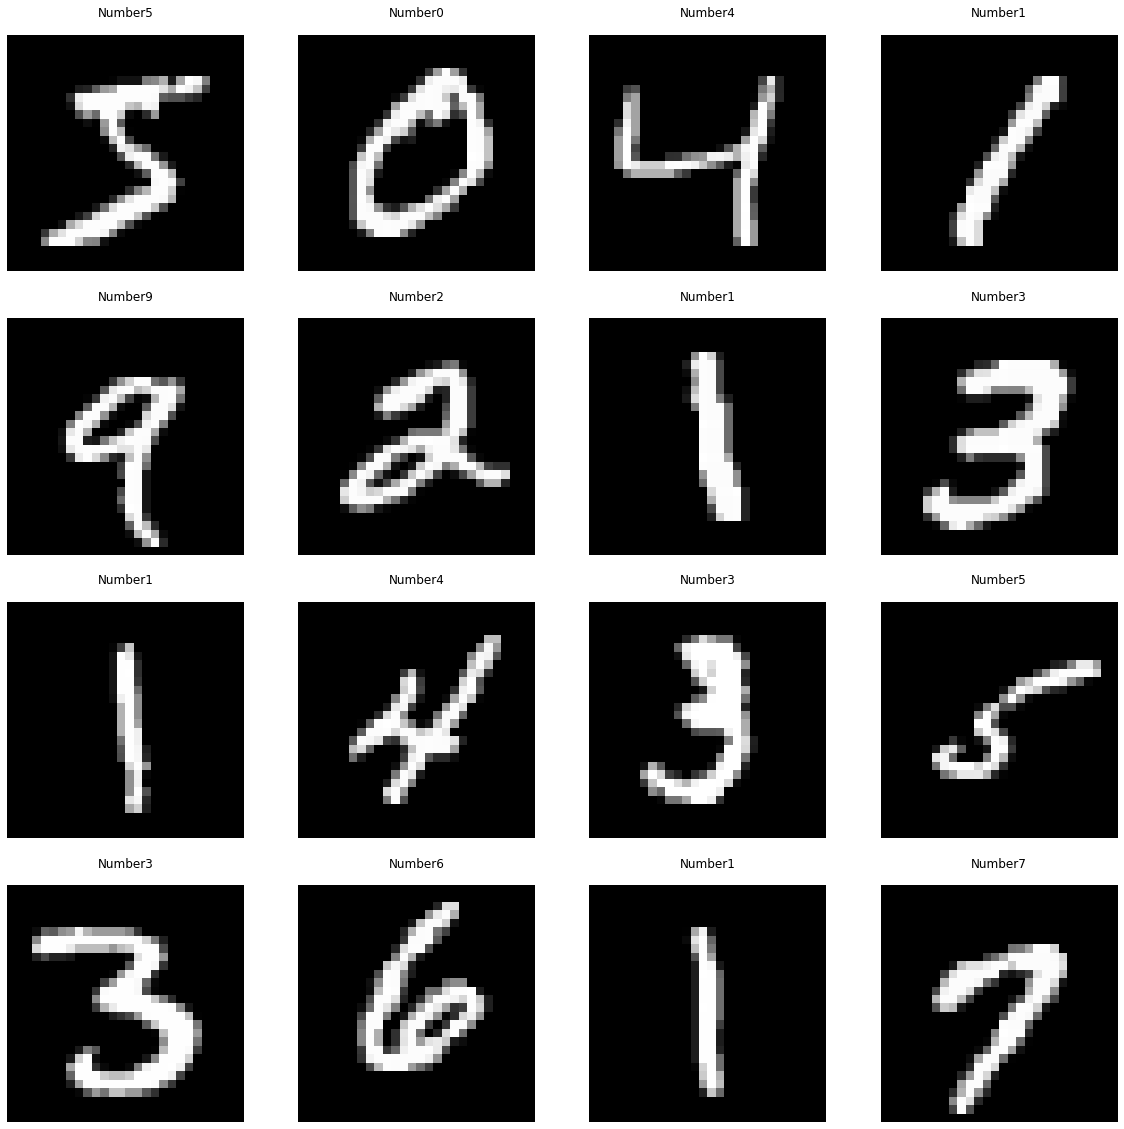

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs = plt.subplots(4, 4, figsize = (20,20))
plt.gray()
for i, ax in enumerate(axs.flat):
  ax.matshow(x_train[i])
  ax.axis('off')
  ax.set_title('Number{}'.format(y_train[i]))

In [25]:
x_train = x_train.reshape(x_train.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)
input_shape = (28, 28)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add (Conv2D (28, kernel_size=(3,3), input_shape=input_shape))
model.add (MaxPooling2D(pool_size=(2, 2)))
model.add (Flatten())
model. add (Dense (128, activation=tf.nn.relu))
model.add (Dropout(0.2))
model.add (Dense(10, activation=tf.nn.softmax))

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=1)

1875/1875 [==============================] - 40s 21ms/step - loss: 0.1963 - accuracy: 0.9416


In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0683 - accuracy: 0.9779


[0.06831788271665573, 0.9779000282287598]

In [9]:
pred = model.predict(x_test)

In [10]:
pred

array([[5.6428227e-08, 2.8461884e-07, 3.5882472e-06, ..., 9.9998081e-01,
        6.4579893e-08, 2.4157716e-06],
       [1.8099976e-05, 1.8830342e-03, 9.9799216e-01, ..., 1.6988887e-08,
        3.7490661e-06, 1.7474260e-08],
       [1.5382108e-06, 9.9836379e-01, 2.2018037e-04, ..., 8.8491134e-04,
        5.8247369e-05, 1.6128992e-05],
       ...,
       [8.3631857e-10, 3.6653549e-07, 7.8706826e-08, ..., 5.1453761e-05,
        1.3738870e-05, 6.1038381e-04],
       [4.5895380e-05, 2.8157595e-07, 1.2480483e-07, ..., 3.0347030e-07,
        3.5066529e-05, 1.9986031e-08],
       [3.7658085e-06, 1.0948754e-08, 1.7490120e-06, ..., 1.1965208e-08,
        5.2331906e-08, 7.9342053e-09]], dtype=float32)

In [19]:
import numpy as np
print(np.argmax(pred[2]))

1


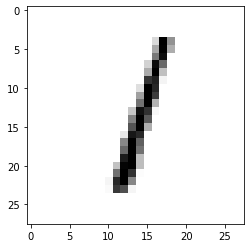

In [26]:
plt.imshow(x_test[2], cmap=plt.cm.binary)
plt.show()